In [1]:
!pip install larq
!pip install keras-tuner

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)
import larq as lq
import keras
from sklearn.model_selection import train_test_split

TensorFlow version: 2.7.0


# Toy-dataset

In [28]:
num_images_left_under = 50000
num_images_right_above = 50000

dataset_left_under = np.empty((num_images_left_under, 2, 2), dtype=np.uint8)
dataset_right_above = np.empty((num_images_right_above, 2, 2), dtype=np.uint8)

for i in range(num_images_left_under):
    image = np.zeros((2, 2), dtype=np.uint8)
    image[0, 0] = np.random.randint(0, 255) #255 not included
    image[0, 1] = np.random.randint(0, 255)
    image[1, 1] = np.random.randint(0, 255)
    image[1, 0] = 255
    dataset_left_under[i] = image
    
for i in range(num_images_right_above):
    image = np.zeros((2, 2), dtype=np.uint8)
    image[0, 0] = np.random.randint(0, 255)
    image[1, 0] = np.random.randint(0, 255)
    image[1, 1] = np.random.randint(0, 255)
    image[0, 1] = 255
    dataset_right_above[i] = image    

y_left_under = np.full(num_images_left_under, 1)
y_right_above = np.full(num_images_right_above, 0) 


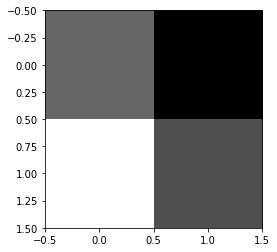

In [29]:
fig = plt.figure
plt.imshow(dataset_left_under[10], cmap='gray')
plt.show()

In [30]:
x_dataset = np.concatenate((dataset_left_under, dataset_right_above))
y_dataset = np.concatenate((y_left_under, y_right_above))

x_train, x_test, y_train, y_test = train_test_split(
    x_dataset, y_dataset, test_size=0.2, random_state=42)

In [31]:
x_train, x_test = x_train.reshape(80000, 4).astype("float32") / 255.0, x_test.reshape(20000, 4).astype("float32") / 255.0

In [32]:
y_test = tf.keras.utils.to_categorical(y_test, 2)
y_train = tf.keras.utils.to_categorical(y_train, 2)

# MNIST dataset resize to 2x2

In [36]:
mnist = tf.keras.datasets.mnist # Dataset consistent of 28x28 images of the handwritten numbers 0 to 9


(x_train, y_train), (x_test, y_test) = mnist.load_data() 

print(x_train.shape) 
#print(x_train)
train_0_1 = np.where((y_train == 0 ) | (y_train == 1))
test_0_1 = np.where((y_test == 0) | (y_test == 1))
x_train, y_train = x_train[train_0_1], y_train[train_0_1]
x_test, y_test = x_test[test_0_1], y_test[test_0_1]

(60000, 28, 28)


In [37]:
#resize
x_train = np.expand_dims(x_train, axis=-1) #extra dimension for resizing
x_train = tf.image.resize(x_train, [2,2]) 
x_test = np.expand_dims(x_test, axis=-1)
x_test = tf.image.resize(x_test, [2,2]) 

In [38]:
#remove extra dimension
x_train = x_train[:, :, :, 0] 
x_test = x_test[:, :, :, 0]

In [39]:
#from tensorflow to numpy array
x_train = x_train.numpy()
x_test = x_test.numpy()

In [40]:
# Before preproccessing, the data (intensity of the pixels) ranges from 0 (which corresponds to black) 
# to 255 (which corresponds to white). Any intensity in between can be considered as gray
# The data should be in a scale from 0 to 1, so I divided the intensity of the pixels by 255
x_train, x_test = x_train.reshape(12665, 4).astype("float32") / 255.0, x_test.reshape(2115, 4).astype("float32") / 255.0

In [41]:
y_test = tf.keras.utils.to_categorical(y_test, 2)
y_train = tf.keras.utils.to_categorical(y_train, 2)

# neural network

In [42]:
def create_model():
    input_dim = 4
    classes = 2

    # This is the main network we'll actually use to predict labels.
    model = keras.Sequential(
        [keras.layers.Dense(6, activation=tf.nn.sigmoid, use_bias=False),
         keras.layers.Dense(2, activation=tf.nn.softmax, use_bias=False),]
    )
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [8]:
input_dim = 4
classes = 2

# This is the main network we'll actually use to predict labels.
model = keras.Sequential(
    [keras.layers.Dense(2, activation=tf.nn.softmax),]
)

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',
                 metrics=['accuracy'])

# When the next line is executed, the training of the model is done.
# Epochs stands for the number of cycles the ANN trains for, with the entire training dataset. 
history = model.fit(x_train, y_train, epochs=50, batch_size=75)
    
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/50
169/169 [==============================] - 0s 937us/step - loss: 2.2177 - accuracy: 0.2459
Epoch 2/50
169/169 [==============================] - 0s 973us/step - loss: 2.1846 - accuracy: 0.2503
Epoch 3/50
169/169 [==============================] - 0s 981us/step - loss: 2.1529 - accuracy: 0.2542
Epoch 4/50
169/169 [==============================] - 0s 991us/step - loss: 2.1221 - accuracy: 0.2564
Epoch 5/50
169/169 [==============================] - 0s 1ms/step - loss: 2.0923 - accuracy: 0.2597
Epoch 6/50
169/169 [==============================] - 0s 895us/step - loss: 2.0634 - accuracy: 0.2624
Epoch 7/50
169/169 [==============================] - 0s 886us/step - loss: 2.0354 - accuracy: 0.2651
Epoch 8/50
169/169 [==============================] - 0s 884us/step - loss: 2.0082 - accuracy: 0.2684
Epoch 9/50
169/169 [==============================] - 0s 884us/step - loss: 1.9818 - accuracy: 0.2700
Epoch 10/50
169/169 [==============================] - 0s 872us/step - loss: 1.9561 

In [44]:
accu = []

for i in range(10):
    #model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',
    #             metrics=['accuracy'])
    model = create_model()
    # When the next line is executed, the training of the model is done.
    # Epochs stands for the number of cycles the ANN trains for, with the entire training dataset. 
    history = model.fit(x_train, y_train, epochs=50, batch_size=75, verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    accu.append(test_acc)

67/67 [==============================] - 0s 802us/step - loss: 0.5509 - accuracy: 0.7877


In [49]:
test_loss, test_acc = model.evaluate(x_test, y_test)

67/67 [==============================] - 0s 775us/step - loss: 0.3799 - accuracy: 0.8463


In [45]:
data = [0.8444, 0.8444, 0.8463]  # Replace with your data

mean = np.mean(accu)
std = np.std(accu)

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: 0.8026004791259765
Standard Deviation: 0.007999492405818973
